<a href="https://colab.research.google.com/github/christophersingh/Mental-Health-Classification-Research-/blob/main/Clustering_No_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#read in the data
ny = pd.read_csv('./new_york.csv')
ny

,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,date,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,counts,sentiment__negative,sentiment__positive
0,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,171.46,13.55,0.23,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
1,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,1554.45,153.69,12.88,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
2,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2529.03,630.34,113.37,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
3,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2552.64,1192.50,364.17,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
4,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2976.74,1830.07,909.18,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,20207.72,1160.60,67.68,2021-02-01,224684.00000,13326.000000,794.000000,419169.0,501.0,49.0
35780,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,15941.19,2540.10,476.51,2021-02-01,161559.00000,25652.000000,4800.000000,419169.0,501.0,49.0
35781,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,7067.11,2418.35,756.82,2021-02-01,50798.00000,17383.000000,5440.000000,419169.0,501.0,49.0
35782,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,7477.43,3995.12,1989.81,2021-02-01,41994.00000,22437.000000,11175.000000,419169.0,501.0,49.0


In [ ]:
ny["indicator"].replace({"Symptoms of Anxiety Disorder": "0", "Symptoms of Depressive Disorder": "1", "Symptoms of Anxiety Disorder or Depressive Disorder": "2"}, inplace=True)
ny["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)

data_to_use = ny
del data_to_use['group']
del data_to_use['state']
del data_to_use['subgroup']
del data_to_use['time_period_label']
del data_to_use['confidence_interval']
del data_to_use['quartile_range']
del data_to_use['counts']

ny = data_to_use
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indicator               35784 non-null  object 
 1   phase                   35784 non-null  object 
 2   time_period             35784 non-null  float64
 3   time_period_start_date  35784 non-null  object 
 4   time_period_end_date    35784 non-null  object 
 5   value                   35784 non-null  float64
 6   lowci                   35784 non-null  float64
 7   highci                  35784 non-null  float64
 8   age                     35784 non-null  object 
 9   CASE_RATE               35784 non-null  float64
 10  HOSPITALIZED_RATE       35784 non-null  float64
 11  DEATH_RATE              33957 non-null  float64
 12  date                    35784 non-null  object 
 13  CASE_COUNT              35784 non-null  float64
 14  HOSPITALIZED_COUNT      35784 non-null

In [ ]:
ny['DEATH_RATE'].fillna((ny['DEATH_RATE'].mean()), inplace=True)
ny.isna().sum()

indicator                 0
phase                     0
time_period               0
time_period_start_date    0
time_period_end_date      0
value                     0
lowci                     0
highci                    0
age                       0
CASE_RATE                 0
HOSPITALIZED_RATE         0
DEATH_RATE                0
date                      0
CASE_COUNT                0
HOSPITALIZED_COUNT        0
DEATH_COUNT               0
sentiment__negative       0
sentiment__positive       0
dtype: int64

In [ ]:
#Add this cell after API change
ny.loc[ny['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3
ny.loc[ny['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4
ny.loc[ny['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5
ny.rename(columns = {'counts':'twitter_count'}, inplace = True)

In [ ]:
from sklearn import preprocessing

ny["age"] = ny['age'].astype(float)
ny["phase"] = ny['phase'].astype(float)
ny["indicator"] = ny['indicator'].astype(float)
ny["time_period"] = ny['time_period'].astype(float)

"""def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

ny = min_max_normalization(data_to_use)"""
ny

,indicator,phase,time_period,time_period_start_date,time_period_end_date,value,lowci,highci,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,date,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,sentiment__negative,sentiment__positive
0,1.0,1.0,1.0,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,29.0,171.46,13.55,0.23,2020-04-23,90629.21686,19942.175032,6754.809134,500.0,50.0
1,1.0,1.0,1.0,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,29.0,1554.45,153.69,12.88,2020-04-23,90629.21686,19942.175032,6754.809134,500.0,50.0
2,1.0,1.0,1.0,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,29.0,2529.03,630.34,113.37,2020-04-23,90629.21686,19942.175032,6754.809134,500.0,50.0
3,1.0,1.0,1.0,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,29.0,2552.64,1192.50,364.17,2020-04-23,90629.21686,19942.175032,6754.809134,500.0,50.0
4,1.0,1.0,1.0,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,29.0,2976.74,1830.07,909.18,2020-04-23,90629.21686,19942.175032,6754.809134,500.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,2.0,5.0,23.0,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,80.0,20207.72,1160.60,67.68,2021-02-01,224684.00000,13326.000000,794.000000,501.0,49.0
35780,2.0,5.0,23.0,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,80.0,15941.19,2540.10,476.51,2021-02-01,161559.00000,25652.000000,4800.000000,501.0,49.0
35781,2.0,5.0,23.0,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,80.0,7067.11,2418.35,756.82,2021-02-01,50798.00000,17383.000000,5440.000000,501.0,49.0
35782,2.0,5.0,23.0,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,80.0,7477.43,3995.12,1989.81,2021-02-01,41994.00000,22437.000000,11175.000000,501.0,49.0


In [ ]:
ny = ny[['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE','DEATH_RATE','CASE_COUNT','HOSPITALIZED_COUNT','DEATH_COUNT','indicator']]
ny

,phase,time_period,value,lowci,highci,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,indicator
0,1.0,1.0,28.7,24.6,33.1,29.0,171.46,13.55,0.23,90629.21686,19942.175032,6754.809134,1.0
1,1.0,1.0,28.7,24.6,33.1,29.0,1554.45,153.69,12.88,90629.21686,19942.175032,6754.809134,1.0
2,1.0,1.0,28.7,24.6,33.1,29.0,2529.03,630.34,113.37,90629.21686,19942.175032,6754.809134,1.0
3,1.0,1.0,28.7,24.6,33.1,29.0,2552.64,1192.50,364.17,90629.21686,19942.175032,6754.809134,1.0
4,1.0,1.0,28.7,24.6,33.1,29.0,2976.74,1830.07,909.18,90629.21686,19942.175032,6754.809134,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,5.0,23.0,35.8,32.0,39.7,80.0,20207.72,1160.60,67.68,224684.00000,13326.000000,794.000000,2.0
35780,5.0,23.0,35.8,32.0,39.7,80.0,15941.19,2540.10,476.51,161559.00000,25652.000000,4800.000000,2.0
35781,5.0,23.0,35.8,32.0,39.7,80.0,7067.11,2418.35,756.82,50798.00000,17383.000000,5440.000000,2.0
35782,5.0,23.0,35.8,32.0,39.7,80.0,7477.43,3995.12,1989.81,41994.00000,22437.000000,11175.000000,2.0


In [ ]:
names = ['Symptoms of Anxiety Disorder', 'Symptoms of Depression Disorder', 'Symptoms of Anxiety or Depression Disorder' ]
feature_names = ['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE', 'DEATH_RATE', 'CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']

In [ ]:
dataset = ny.values
dataset

array([[1.00000000e+00, 1.00000000e+00, 2.87000000e+01, ...,
        1.99421750e+04, 6.75480913e+03, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 2.87000000e+01, ...,
        1.99421750e+04, 6.75480913e+03, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 2.87000000e+01, ...,
        1.99421750e+04, 6.75480913e+03, 1.00000000e+00],
       ...,
       [5.00000000e+00, 2.30000000e+01, 3.58000000e+01, ...,
        1.73830000e+04, 5.44000000e+03, 2.00000000e+00],
       [5.00000000e+00, 2.30000000e+01, 3.58000000e+01, ...,
        2.24370000e+04, 1.11750000e+04, 2.00000000e+00],
       [5.00000000e+00, 2.30000000e+01, 3.58000000e+01, ...,
        7.98920000e+04, 2.22310000e+04, 2.00000000e+00]])

In [ ]:
X = dataset[:, :-1]
y = dataset[:,-1]

In [ ]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y.reshape(-1, 1))
X = pd.DataFrame(x_scaled)
y = pd.DataFrame(y_scaled)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.340102,0.294737,0.372642,0.0,0.000000,0.000000,0.000000,0.164543,0.245592,0.303533
1,0.0,0.0,0.340102,0.294737,0.372642,0.0,0.069024,0.035197,0.006358,0.164543,0.245592,0.303533
2,0.0,0.0,0.340102,0.294737,0.372642,0.0,0.117665,0.154911,0.056866,0.164543,0.245592,0.303533
3,0.0,0.0,0.340102,0.294737,0.372642,0.0,0.118844,0.296102,0.182923,0.164543,0.245592,0.303533
4,0.0,0.0,0.340102,0.294737,0.372642,0.0,0.140010,0.456232,0.456855,0.164543,0.245592,0.303533
...,...,...,...,...,...,...,...,...,...,...,...,...
35779,1.0,1.0,0.700508,0.684211,0.683962,1.0,1.000000,0.288090,0.033902,0.422109,0.162334,0.035282
35780,1.0,1.0,0.700508,0.684211,0.683962,1.0,0.787060,0.634561,0.239387,0.300823,0.317444,0.215562
35781,1.0,1.0,0.700508,0.684211,0.683962,1.0,0.344159,0.603983,0.380276,0.088013,0.213387,0.244363
35782,1.0,1.0,0.700508,0.684211,0.683962,1.0,0.364637,1.000000,1.000000,0.071098,0.276986,0.502453


In [ ]:
y

,0
0,0.5
1,0.5
2,0.5
3,0.5
4,0.5
...,...
35779,1.0
35780,1.0
35781,1.0
35782,1.0


In [ ]:
# Helper

def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = pd.read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

Feature 0: 0.286601
Feature 1: 0.089414
Feature 2: 36075.900252
Feature 3: 41365.241769
Feature 4: 29433.792617
Feature 5: 0.397847
Feature 6: 0.004857
Feature 7: 0.823220
Feature 8: 0.631747
Feature 9: 0.409344
Feature 10: 0.906795
Feature 11: 0.953940


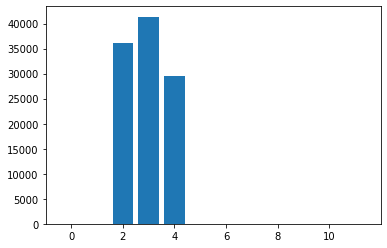

In [ ]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
"""# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
"""
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.286601
Feature 1: 0.089414
Feature 2: 36075.900252
Feature 3: 41365.241769
Feature 4: 29433.792617
Feature 5: 0.397847
Feature 6: 0.004857
Feature 7: 0.823220
Feature 8: 0.631747
Feature 9: 0.409344
Feature 10: 0.906795
Feature 11: 0.953940


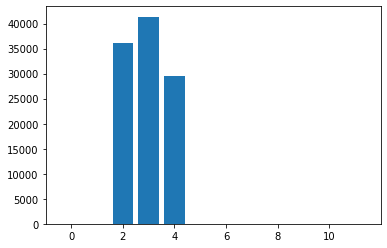

In [ ]:
#feature selection 

def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#https://www.dezyre.com/recipes/select-features-using-best-anova-f-values-in-python

def ProjectPro_Ex_56():
    print()
    print('**How we can select features using best ANOVA F-values in Python**')

    # loading libraries
    from sklearn.datasets import load_iris
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif

    # Selecting Features With Best ANOVA F-Values
    # Creating an SelectKBest object to select features with two best ANOVA F-Values
    fvalue_Best = SelectKBest(f_classif, k='all')
    # Applying the SelectKBest object to the features and target
    X_kbest = fvalue_Best.fit_transform(X, y)
    print(X_kbest)

    # Showing results
    print('Original number of features:', X.shape)
    print('Reduced number of features:', X_kbest.shape)
    return X_kbest

result = ProjectPro_Ex_56()


**How we can select features using best ANOVA F-values in Python**
[[0.         0.         0.34010152 ... 0.16454271 0.24559151 0.30353311]
 [0.         0.         0.34010152 ... 0.16454271 0.24559151 0.30353311]
 [0.         0.         0.34010152 ... 0.16454271 0.24559151 0.30353311]
 ...
 [1.         1.         0.70050761 ... 0.0880131  0.21338686 0.24436344]
 [1.         1.         0.70050761 ... 0.07109755 0.27698638 0.50245263]
 [1.         1.         0.70050761 ... 1.         1.         1.        ]]
Original number of features: (35784, 12)
Reduced number of features: (35784, 12)


In [ ]:
#https://kgptalkie.com/feature-selection-based-on-univariate-anova-test-for-classification-machine-learning-kgp-talkie/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
X.shape, y.shape

((35784, 12), (35784, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1, stratify = y)

In [ ]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [ ]:
X_train_filter.shape, X_test_filter.shape

((17892, 12), (17892, 12))

In [ ]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [ ]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.duplicated().sum()

0

In [ ]:
duplicated_features = X_train_T.duplicated()

In [ ]:
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [ ]:
X_train_unique.shape, X_train.shape

((17892, 12), (17892, 12))

In [ ]:
sel = f_classif(X_train_unique, y_train)
sel

(array([1.56579620e-01, 3.57054103e-01, 3.62278773e+04, 4.16040035e+04,
        2.95416375e+04, 9.41215062e-01, 5.21075844e-01, 3.27348209e-01,
        2.37387347e-01, 4.75595467e-02, 1.95450533e-01, 2.57441409e-01]),
 array([0.85506461, 0.69973963, 0.        , 0.        , 0.        ,
        0.39017281, 0.59389029, 0.72083702, 0.78868822, 0.95355381,
        0.82246578, 0.77302978]))

In [ ]:
p_values = pd.Series(sel[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending = True, inplace = True)

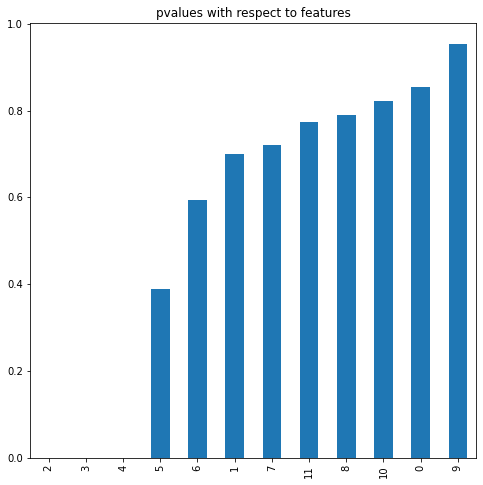

In [ ]:
p_values.plot.bar(figsize = (8, 8))
plt.title('pvalues with respect to features')
plt.show()

In [ ]:
p_values = p_values[p_values<0.05]

In [ ]:
p_values.index

Int64Index([2, 3, 4], dtype='int64')

In [ ]:
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

In [ ]:
#https://chrisalbon.com/machine_learning/feature_selection/anova_f-value_for_feature_selection/

# Create an SelectKBest object to select features with six best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=6)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 12
Reduced number of features: 6


# PCA Analysis Below

In [ ]:
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [ ]:
ny = pd.read_csv('./new_york.csv')
ny

,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,date,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,counts,sentiment__negative,sentiment__positive
0,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,171.46,13.55,0.23,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
1,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,1554.45,153.69,12.88,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
2,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2529.03,630.34,113.37,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
3,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2552.64,1192.50,364.17,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
4,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2976.74,1830.07,909.18,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,20207.72,1160.60,67.68,2021-02-01,224684.00000,13326.000000,794.000000,419169.0,501.0,49.0
35780,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,15941.19,2540.10,476.51,2021-02-01,161559.00000,25652.000000,4800.000000,419169.0,501.0,49.0
35781,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,7067.11,2418.35,756.82,2021-02-01,50798.00000,17383.000000,5440.000000,419169.0,501.0,49.0
35782,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,7477.43,3995.12,1989.81,2021-02-01,41994.00000,22437.000000,11175.000000,419169.0,501.0,49.0


In [ ]:
ny["indicator"].replace({"Symptoms of Anxiety Disorder": "0", "Symptoms of Depressive Disorder": "1", "Symptoms of Anxiety Disorder or Depressive Disorder": "2"}, inplace=True)
ny["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)

data_to_use = ny
del data_to_use['group']
del data_to_use['state']
del data_to_use['subgroup']
del data_to_use['time_period_label']
del data_to_use['confidence_interval']
del data_to_use['quartile_range']
del data_to_use['counts']
del data_to_use['sentiment__negative']
del data_to_use['sentiment__positive']


ny = data_to_use
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indicator               35784 non-null  object 
 1   phase                   35784 non-null  object 
 2   time_period             35784 non-null  float64
 3   time_period_start_date  35784 non-null  object 
 4   time_period_end_date    35784 non-null  object 
 5   value                   35784 non-null  float64
 6   lowci                   35784 non-null  float64
 7   highci                  35784 non-null  float64
 8   age                     35784 non-null  object 
 9   CASE_RATE               35784 non-null  float64
 10  HOSPITALIZED_RATE       35784 non-null  float64
 11  DEATH_RATE              33957 non-null  float64
 12  date                    35784 non-null  object 
 13  CASE_COUNT              35784 non-null  float64
 14  HOSPITALIZED_COUNT      35784 non-null

In [ ]:
ny['DEATH_RATE'].fillna((ny['DEATH_RATE'].mean()), inplace=True)
#Add this cell after API change
ny.loc[ny['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3
ny.loc[ny['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4
ny.loc[ny['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5
ny.rename(columns = {'counts':'twitter_count'}, inplace = True)

from sklearn import preprocessing

ny["age"] = ny['age'].astype(float)
ny["phase"] = ny['phase'].astype(float)
ny["indicator"] = ny['indicator'].astype(float)
ny["time_period"] = ny['time_period'].astype(float)

In [ ]:
ny = ny[['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE','DEATH_RATE','CASE_COUNT','HOSPITALIZED_COUNT','DEATH_COUNT','indicator']]
ny

,phase,time_period,value,lowci,highci,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,indicator
0,1.0,1.0,28.7,24.6,33.1,29.0,171.46,13.55,0.23,90629.21686,19942.175032,6754.809134,1.0
1,1.0,1.0,28.7,24.6,33.1,29.0,1554.45,153.69,12.88,90629.21686,19942.175032,6754.809134,1.0
2,1.0,1.0,28.7,24.6,33.1,29.0,2529.03,630.34,113.37,90629.21686,19942.175032,6754.809134,1.0
3,1.0,1.0,28.7,24.6,33.1,29.0,2552.64,1192.50,364.17,90629.21686,19942.175032,6754.809134,1.0
4,1.0,1.0,28.7,24.6,33.1,29.0,2976.74,1830.07,909.18,90629.21686,19942.175032,6754.809134,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,5.0,23.0,35.8,32.0,39.7,80.0,20207.72,1160.60,67.68,224684.00000,13326.000000,794.000000,2.0
35780,5.0,23.0,35.8,32.0,39.7,80.0,15941.19,2540.10,476.51,161559.00000,25652.000000,4800.000000,2.0
35781,5.0,23.0,35.8,32.0,39.7,80.0,7067.11,2418.35,756.82,50798.00000,17383.000000,5440.000000,2.0
35782,5.0,23.0,35.8,32.0,39.7,80.0,7477.43,3995.12,1989.81,41994.00000,22437.000000,11175.000000,2.0


In [ ]:
values = ny.values
 
Y = values[:,12]
X = values[:,0:11]

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

min_max_scaler = preprocessing.MinMaxScaler()
#x = StandardScaler().fit_transform(x)
x_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(x_scaled)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10
0,-1.046623,-2.028335,-0.519765,-0.617653,-0.412523,-1.574064,-1.255775,-1.196508,-0.878629,-3.168163e-16,4.000775e-16
1,-1.046623,-2.028335,-0.519765,-0.617653,-0.412523,-1.574064,-0.837174,-1.056190,-0.856327,-3.168163e-16,4.000775e-16
2,-1.046623,-2.028335,-0.519765,-0.617653,-0.412523,-1.574064,-0.542190,-0.578936,-0.679167,-3.168163e-16,4.000775e-16
3,-1.046623,-2.028335,-0.519765,-0.617653,-0.412523,-1.574064,-0.535043,-0.016063,-0.237016,-3.168163e-16,4.000775e-16
4,-1.046623,-2.028335,-0.519765,-0.617653,-0.412523,-1.574064,-0.406678,0.622315,0.723818,-3.168163e-16,4.000775e-16
...,...,...,...,...,...,...,...,...,...,...,...
35779,1.655567,1.392188,0.725645,0.752476,0.685975,1.221661,4.808764,-0.048004,-0.759717,1.459284e+00,-3.637985e-01
35780,1.655567,1.392188,0.725645,0.752476,0.685975,1.221661,3.517378,1.333245,-0.038964,7.721221e-01,3.139617e-01
35781,1.655567,1.392188,0.725645,0.752476,0.685975,1.221661,0.831388,1.211341,0.455212,-4.335917e-01,-1.407194e-01
35782,1.655567,1.392188,0.725645,0.752476,0.685975,1.221661,0.955583,2.790110,2.628930,-5.294296e-01,1.371810e-01


In [ ]:
cluster_df = X

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [ ]:
finalDf = pd.concat([principalDf, ny[['indicator']]], axis = 1)

In [ ]:
finalDf

,PC1,PC2,indicator
0,-2.280133,-1.959285,1.0
1,-2.141880,-1.739945,1.0
2,-1.956870,-1.399967,1.0
3,-1.798810,-1.061538,1.0
4,-1.528919,-0.495138,1.0
...,...,...,...
35779,3.202578,2.257716,2.0
35780,3.181432,2.476547,2.0
35781,2.369157,1.441021,2.0
35782,2.970185,2.718918,2.0


In [ ]:
plt.figure(figsize=(8,6))
targets = ['Anxiety', 'Depression', 'Anxiety or Depression']
plt.scatter(finalDf.iloc[:,0],finalDf.iloc[:,1],
            c=finalDf['indicator'],
            cmap='rainbow'
           )
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
pass;

NameError: ignored

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="indicator",
    palette=sns.color_palette("hls", 3),
    data=finalDf,
    legend="full",
    alpha=0.3
)

NameError: ignored

In [ ]:
pca.explained_variance_ratio_

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA()
components = pca.fit_transform(ny[feature_names])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=ny["indicator"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

NameError: ignored

In [ ]:

values = finalDf.values
 
Y = values[:,-1]
X = values[:,0:2]
Y

array([1., 1., 1., ..., 2., 2., 2.])

In [ ]:
X

array([[-2.28013281, -1.95928524],
       [-2.14187953, -1.73994476],
       [-1.95686961, -1.39996711],
       ...,
       [ 2.36915657,  1.44102143],
       [ 2.97018547,  2.71891842],
       [ 2.66239893,  1.08614425]])

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
finalDf2 = finalDf
finalDf3 = finalDf 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X,Y)
y_kmeans = kmeans.predict(X)

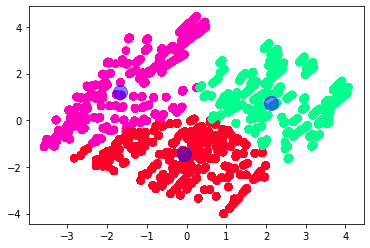

In [ ]:
plt.scatter(finalDf.iloc[:,0], finalDf.iloc[:,1], c=y_kmeans, s=50, cmap='gist_rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, -1], c='blue', s=200, alpha=0.5);

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

acc = accuracy_score(finalDf.iloc[:,2] , y_kmeans)
print("Accuracy:",accuracy_score(finalDf.iloc[:,2] , y_kmeans))
print(classification_report(finalDf.iloc[:,2] , y_kmeans))
print(confusion_matrix(finalDf.iloc[:,2] , y_kmeans))

Accuracy: 0.18916275430359938
              precision    recall  f1-score   support

         0.0       0.43      0.53      0.47     11928
         1.0       0.05      0.04      0.05     11928
         2.0       0.00      0.00      0.00     11928

    accuracy                           0.19     35784
   macro avg       0.16      0.19      0.17     35784
weighted avg       0.16      0.19      0.17     35784

[[ 6279  4200  1449]
 [ 1288   490 10150]
 [ 6993  4935     0]]


In [ ]:
# K meansfrom sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=3,random_state= 42)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(cluster_df)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(cluster_df, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(cluster_df, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(cluster_df, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.2023
Calinski Harabasz Score: 8916.7504
Davies Bouldin Score: 1.6260


In [ ]:
finalDf['cluster'] = y_kmeans
finalDf['indicator'] = finalDf['indicator'] + 1
finalDf['cluster'] = finalDf['cluster'] + 1

In [ ]:
import math
def get_entropys(df_clustered, label_col_name='indicator', cluster_col_name='cluster', cluster_values=range(1,3,1)):
    p = [[round(df_clustered[(df_clustered[label_col_name]==label) & (df_clustered[cluster_col_name]==cluster)].shape[0]/
                df_clustered[df_clustered[cluster_col_name]==cluster].shape[0],3) for label in cluster_values] for cluster in cluster_values]
    p_log_p = [[p_i*math.log(p_i) for p_i in p_i_s if p_i!=0] for p_i_s in p]
    e = [-round(sum(p_log_p_i),3) for p_log_p_i in p_log_p]
    return e
  
entropys_5 = get_entropys(finalDf, label_col_name='indicator', cluster_col_name='cluster', cluster_values=range(1,3,1))
print("Clusters' Entropy")
print("Entropy: {0:.3f}".format(min(entropys_5)))

Clusters' Entropy
Entropy: 0.377


In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(finalDf['indicator'], finalDf['cluster'])
print("The purity is:",purity)

The purity is: 0.61697965571205


In [ ]:
from sklearn.metrics.cluster import v_measure_score
v_measure = v_measure_score(finalDf['indicator'], finalDf['cluster'])
print("The v_measure is:",v_measure)

The v_measure is: 0.33727263075389413


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
randScore = adjusted_rand_score(finalDf['indicator'], finalDf['cluster'])
print("The rand_score is:",randScore)

The rand_score is: 0.31730196619316403


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = finalDf
labels_final = df['indicator'].values
#df = df[:,0:1]
#del df['indicator']
df = df.drop(['indicator'], axis=1)

In [ ]:
df

,PC1,PC2,cluster
0,-2.280133,-1.959285,3
1,-2.141880,-1.739945,3
2,-1.956870,-1.399967,3
3,-1.798810,-1.061538,3
4,-1.528919,-0.495138,2
...,...,...,...
35779,3.202578,2.257716,1
35780,3.181432,2.476547,1
35781,2.369157,1.441021,1
35782,2.970185,2.718918,1


In [ ]:
#Creating the model
 
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
 
#predicting the labels
 
labels = agg_clustering.fit_predict(X, Y)

In [ ]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

print('{} has occurred {} times'.format(0, countX(labels, 0)))
print('{} has occurred {} times'.format(1, countX(labels, 1)))
print('{} has occurred {} times'.format(2, countX(labels, 2)))

0 has occurred 18984 times
1 has occurred 10402 times
2 has occurred 6398 times


In [ ]:
print("Accuracy:",accuracy_score(finalDf.iloc[:,2] , labels))
print(classification_report(finalDf.iloc[:,2] , labels))
print(confusion_matrix(finalDf.iloc[:,2] , labels))

Accuracy: 0.2104851330203443
              precision    recall  f1-score   support

         0.0       0.37      0.59      0.46     11928
         1.0       0.05      0.04      0.04     11928
         2.0       0.00      0.00      0.00     11928

    accuracy                           0.21     35784
   macro avg       0.14      0.21      0.17     35784
weighted avg       0.14      0.21      0.17     35784

[[7042 4837   49]
 [5089  490 6349]
 [6853 5075    0]]


In [ ]:
finalDf.drop(['cluster'], axis=1, inplace=True)
finalDf['cluster'] = labels
finalDf['cluster'] = finalDf['cluster'] + 1

In [ ]:
import math
def get_entropys(df_clustered, label_col_name='indicator', cluster_col_name='cluster', cluster_values=range(1,3,1)):
    p = [[round(df_clustered[(df_clustered[label_col_name]==label) & (df_clustered[cluster_col_name]==cluster)].shape[0]/
                df_clustered[df_clustered[cluster_col_name]==cluster].shape[0],3) for label in cluster_values] for cluster in cluster_values]
    p_log_p = [[p_i*math.log(p_i) for p_i in p_i_s if p_i!=0] for p_i_s in p]
    e = [-round(sum(p_log_p_i),3) for p_log_p_i in p_log_p]
    return e
  
entropys_5 = get_entropys(finalDf, label_col_name='indicator', cluster_col_name='cluster', cluster_values=range(1,3,1))
print("Clusters' Entropy")
print("Entropy: {0:.3f}".format(min(entropys_5)))

Clusters' Entropy
Entropy: 0.494


In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(finalDf['indicator'], finalDf['cluster'])
print("The purity is:",purity)

from sklearn.metrics.cluster import v_measure_score
v_measure = v_measure_score(finalDf['indicator'], finalDf['cluster'])
print("The v_measure is:",v_measure)

from sklearn.metrics.cluster import adjusted_rand_score
randScore = adjusted_rand_score(finalDf['indicator'], finalDf['cluster'])
print("The rand_score is:",randScore)

The purity is: 0.5160406885758998
The v_measure is: 0.2530496216487975
The rand_score is: 0.14178826784813234


In [ ]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit(cluster_df)
yhat_2 = model.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(cluster_df, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(cluster_df, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(cluster_df, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.2307
Calinski Harabasz Score: 8757.3304
Davies Bouldin Score: 1.5863


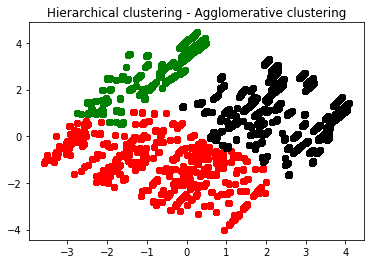

In [ ]:
#filter rows of original data
filtered_label0 = df[labels == 0]
filtered_label1 = df[labels == 1]
filtered_label2 = df[labels == 2]
 
#Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'green')
plt.title("Hierarchical clustering - Agglomerative clustering")
plt.show()

In [ ]:
"""import math
def get_entropys(df_clustered, label_col_name='indicator', cluster_col_name='cluster', cluster_values=range(1,3,1)):
    p = [[round(df_clustered[(df_clustered[label_col_name]==label) & (df_clustered[cluster_col_name]==cluster)].shape[0]/
                df_clustered[df_clustered[cluster_col_name]==cluster].shape[0],3) for label in cluster_values] for cluster in cluster_values]
    p_log_p = [[p_i*math.log(p_i) for p_i in p_i_s if p_i!=0] for p_i_s in p]
    e = [-round(sum(p_log_p_i),3) for p_log_p_i in p_log_p]
    return e
  
entropys_5 = get_entropys(cluster_df, label_col_name=finalDf['indicator'], cluster_col_name=yhat.labels_, cluster_values=range(1,3,1))
print("Clusters' Entropy")
print("Entropy: {0:.3f}".format(min(entropys_5)))"""

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
Z = linkage(df, method = 'ward')
 
"""#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()"""

NameError: ignored

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

**TRY FCLUSTER() TO EXTRACT LABELS**

**Also try method='complete',and method='single' for linkage**


```
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')
```



**t-SNE Clustering**



```
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

```



NameError: ignored

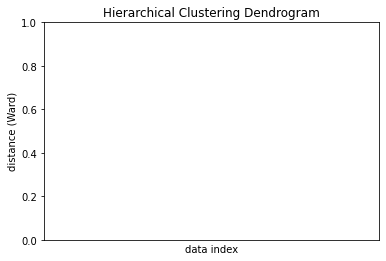

In [ ]:
plt.title('Hierarchical Clustering Dendrogram')
plt.rcParams["figure.figsize"] = (30,20)
# Plot axis labels
plt.xlabel('data index')
plt.xticks([])
plt.ylabel('distance (Ward)')

# Make the dendrogram
dendrogram(Z, leaf_rotation=90)
plt.xticks([])
# Show the graph
plt.show()

0.1342385303409489


<Figure size 360x360 with 0 Axes>

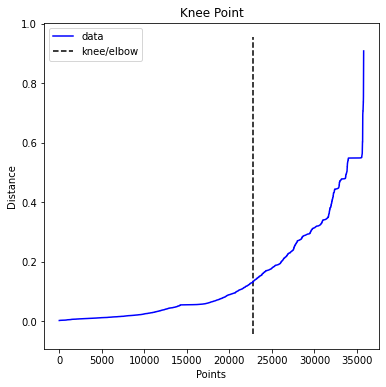

In [ ]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(cluster_df)
distances, indices = neighbors.kneighbors(cluster_df)
distances = np.sort(distances[:,10], axis=0)
!pip install -q kneed
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

Optimal number of min_samples based on silhouette score: [2]


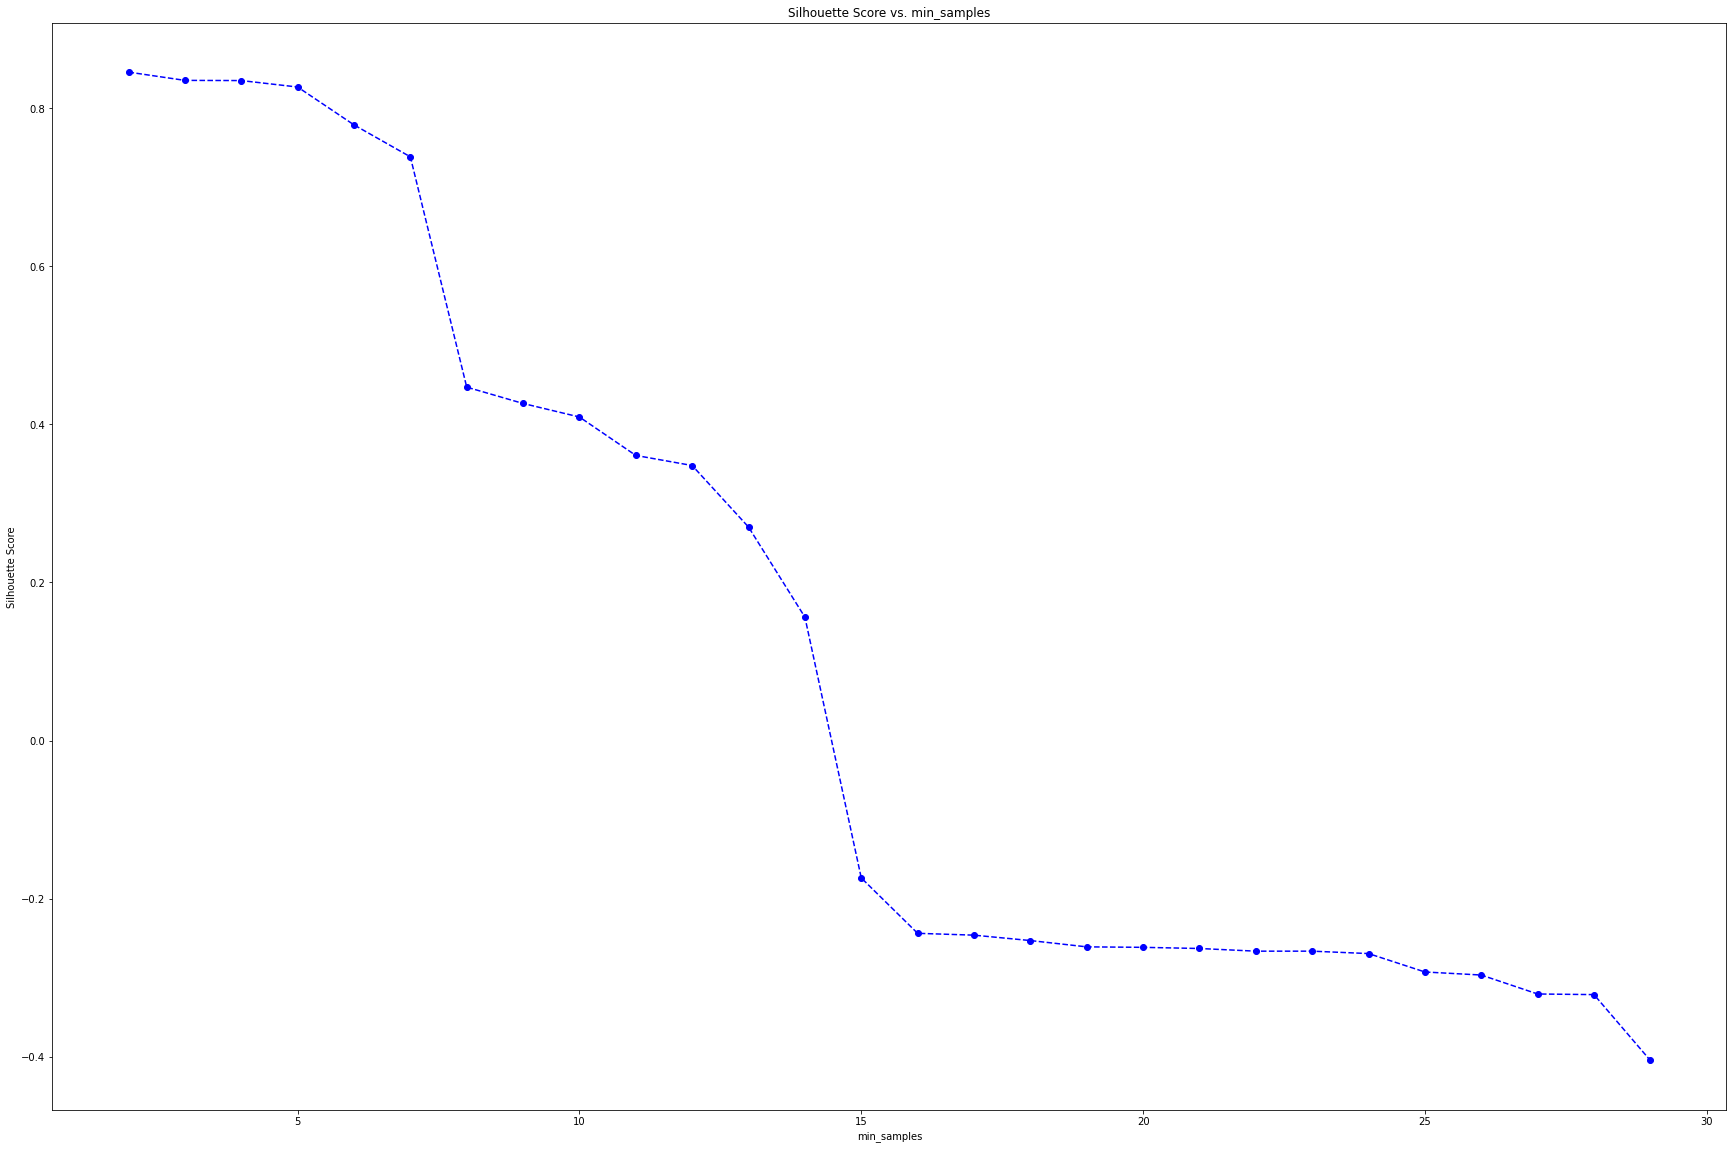

In [ ]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    '''
    
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    #instantiate kmeans
    dbscan = DBSCAN(eps= 0.1342385303409489, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(cluster_df)
    
    # Calculate Silhoutte Score

    score = silhouette_score(cluster_df, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(cluster_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

In [ ]:
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=0.1342385303409489, min_samples= 7)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(cluster_df, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(cluster_df, yhat)
score_dbsacn_d = davies_bouldin_score(cluster_df, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.8212
Calinski Harabasz Score: 546.0145
Davies Bouldin Score: 0.7945


In [ ]:
cluster_df['cluster'] = yhat
#cluster_df['cluster'] = cluster_df['cluster'] + 1

In [ ]:
import math
def get_entropys(df_clustered, label_col_name='indicator', cluster_col_name='cluster', cluster_values=range(1,3,1)):
    p = [[round(df_clustered[(df_clustered[label_col_name]==label) & (df_clustered[cluster_col_name]==cluster)].shape[0]/
                df_clustered[df_clustered[cluster_col_name]==cluster].shape[0],3) for label in cluster_values] for cluster in cluster_values]
    p_log_p = [[p_i*math.log(p_i) for p_i in p_i_s if p_i!=0] for p_i_s in p]
    e = [-round(sum(p_log_p_i),3) for p_log_p_i in p_log_p]
    return e
  
entropys_5 = get_entropys(finalDf, label_col_name='indicator', cluster_col_name='cluster', cluster_values=range(1,3,1))
print("Clusters' Entropy")
print(entropys_5)
print("Entropy: {0:.3f}".format(min(entropys_5)))

Clusters' Entropy
[0.721, 0.494]
Entropy: 0.494


In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(finalDf['indicator'], finalDf['cluster'])
print("The purity is:",purity)

from sklearn.metrics.cluster import v_measure_score
v_measure = v_measure_score(finalDf['indicator'], finalDf['cluster'])
print("The v_measure is:",v_measure)

from sklearn.metrics.cluster import adjusted_rand_score
randScore = adjusted_rand_score(finalDf['indicator'], finalDf['cluster'])
print("The rand_score is:",randScore)

The purity is: 0.5160406885758998
The v_measure is: 0.2530496216487975
The rand_score is: 0.14178826784813234


In [ ]:
from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        gmm.fit(cluster_df)
        score.append((cov,n_comp,gmm.bic(cluster_df)))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2 = score_1[score_1.BIC_Score == score_1.BIC_Score.min()]

score_2.head(n=2)

,Covariance_Type,N_Components,BIC_Score
115,full,29,-1.490699e+06


In [ ]:
# Silhouette Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = 10)
        model = gmm.fit(cluster_df)
        model_2 = model.predict(cluster_df)
        score_s = silhouette_score(cluster_df, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

,Covariance_Type,N_Components,Silhouette_Score
5,spherical,7,0.246607


In [ ]:
# Calinski Harabasz Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(cluster_df)
        model_2 = model.predict(cluster_df)
        score_c = calinski_harabasz_score(cluster_df, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=5)

,Covariance_Type,N_Components,Calinski_Harabasz_Score
56,diag,2,9451.982699


In [ ]:
# Davies Bouldin Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(cluster_df)
        model_2 = model.predict(cluster_df)
        score_d = davies_bouldin_score(cluster_df, model_2)
        score.append((cov,n_comp,score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.max()]
score_2.head(n=2)

,Covariance_Type,N_Components,Davies_Bouldin_Score
32,tied,6,3.306541


In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 2,covariance_type= "diag", random_state = 10)
# fit the model
model.fit(cluster_df)
# assign a cluster to each example
yhat = model.predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)



# Calculate cluster validation score

score_dbsacn_s = silhouette_score(cluster_df, yhat, metric='euclidean')

score_dbsacn_c = calinski_harabasz_score(cluster_df, yhat)

score_dbsacn_d = davies_bouldin_score(cluster_df, yhat)



print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.4443
Calinski Harabasz Score: 21754.9420
Davies Bouldin Score: 0.9142


In [ ]:
cluster_df['cluster'] = yhat
cluster_df['cluster'] = cluster_df['cluster'] + 1

In [ ]:
import math
def get_entropys(df_clustered, label_col_name='indicator', cluster_col_name='cluster', cluster_values=range(1,3,1)):
    p = [[round(df_clustered[(df_clustered[label_col_name]==label) & (df_clustered[cluster_col_name]==cluster)].shape[0]/
                df_clustered[df_clustered[cluster_col_name]==cluster].shape[0],3) for label in cluster_values] for cluster in cluster_values]
    p_log_p = [[p_i*math.log(p_i) for p_i in p_i_s if p_i!=0] for p_i_s in p]
    e = [-round(sum(p_log_p_i),3) for p_log_p_i in p_log_p]
    return e
  
entropys_5 = get_entropys(finalDf, label_col_name='indicator', cluster_col_name='cluster', cluster_values=range(1,3, 1))
print("Clusters' Entropy")
print("Entropy: {0:.3f}".format(min(entropys_5)))

Clusters' Entropy
Entropy: 0.494


In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(finalDf['indicator'], finalDf['cluster'])
print("The purity is:",purity)

from sklearn.metrics.cluster import v_measure_score
v_measure = v_measure_score(finalDf['indicator'], finalDf['cluster'])
print("The v_measure is:",v_measure)

from sklearn.metrics.cluster import adjusted_rand_score
randScore = adjusted_rand_score(finalDf['indicator'], finalDf['cluster'])
print("The rand_score is:",randScore)

The purity is: 0.5160406885758998
The v_measure is: 0.2530496216487975
The rand_score is: 0.14178826784813234
